# K-Means Clustering from scratch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from copy import deepcopy
%matplotlib inline

Preparing the data

In [2]:
def loadData(str):
    file1 = open(str, 'r') 
    Lines = file1.readlines()
    vals = list()
    for i in Lines:
        vals.append(i.replace("\n",''))
    new = list()
    for i in vals:
        new.append(i.split(','))
    for i in range(len(new)):
        for j in range(len(new[i])):
            new[i][j]=float(new[i][j])
    
    new = np.array(new)
    X = new[:,:-3]
    Y=new[:,-1]

    
    return X,Y

In [3]:
def trainer(str):
    X,Y = loadData(str)
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)
    y_trainset = y_trainset.astype(int)
    y_testset = y_testset.astype(int)
    return X_trainset,X_testset,y_trainset,y_testset

In [4]:
X_train,X_test,Y_train,Y_test = trainer('iris_num.data')

In [5]:
k = 3

In [6]:
x = X_train[:,0]
y = X_train[:,1]

In [7]:
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

In [8]:
centroids

array([[4.38385622, 2.63426219],
       [7.44426974, 3.41673907],
       [7.32655604, 3.55677609]])

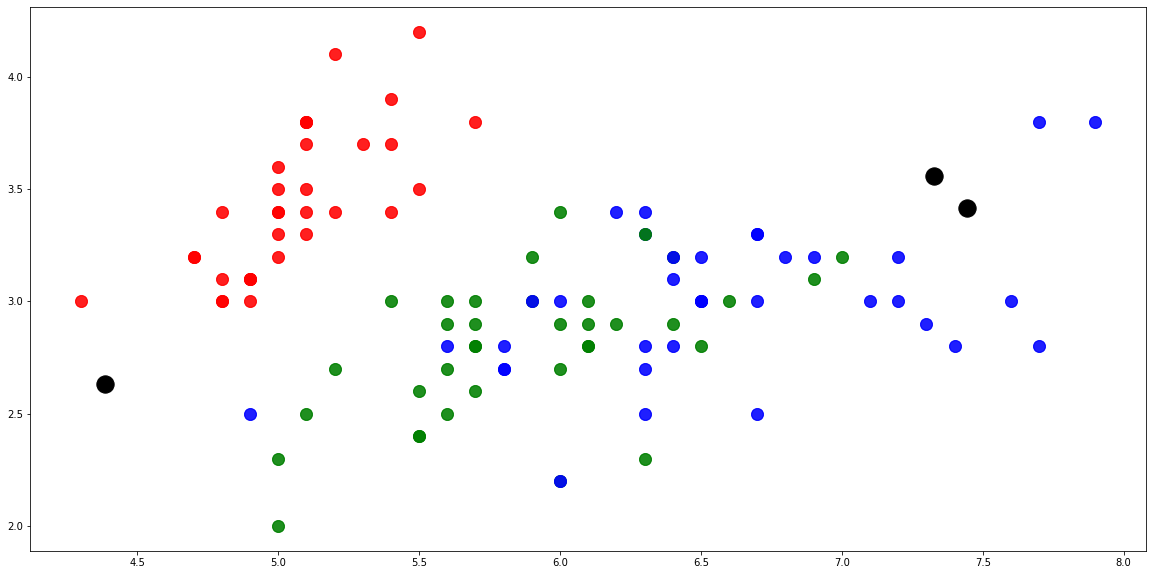

In [9]:
plt.figure(figsize=(20,10))
for i in range(len(X_train)):
    for j in range(3):
        if(Y_train[i]==0):
            plt.scatter(X_train[i][0],X_train[i][1],c='r',s=140,alpha = 0.5)
        elif(Y_train[i]==1):
            plt.scatter(X_train[i][0],X_train[i][1],c='g',s=140,alpha=0.5)
        elif(Y_train[i]==2):
            plt.scatter(X_train[i][0],X_train[i][1],c='b',s=140,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='black',s=300)

In [10]:
def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

In [11]:
# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(X_train))

distances = np.zeros(3)

In [12]:
# Initialize error:
error = np.zeros(3)

error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

In [13]:
while error.all()!=0:
    for i in range(len(X_train)):
        distances[0] = distance(X_train[i],centroids[0])
        distances[1] = distance(X_train[i],centroids[1])
        distances[2] = distance(X_train[i],centroids[2])
        
        cluster = np.argmin(distances)
        labels[i]=cluster
        
    centroids_old = deepcopy(centroids)
    
    for i in range(k):
        points = np.array([X_train[j] for j in range(len(X_train)) if labels[j] == i])
        centroids[i]=np.mean(points,axis=0)
    error[0] = distance(centroids[0], centroids_old[0])
    error[1] = distance(centroids[1], centroids_old[1])
    error[2] = distance(centroids[2], centroids_old[2])

<Figure size 432x288 with 0 Axes>

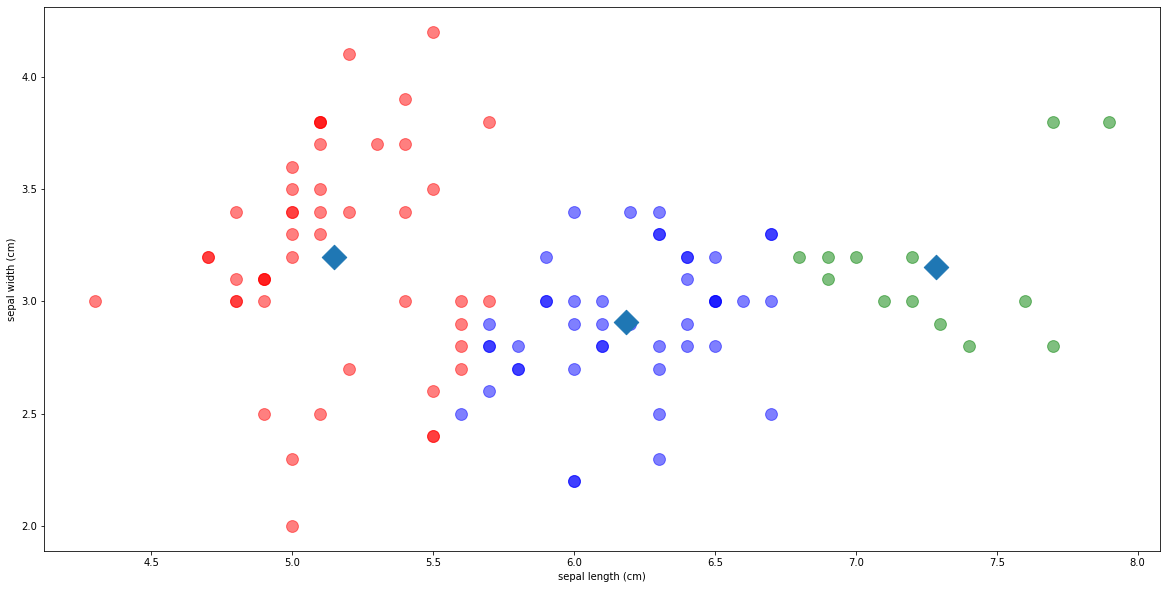

In [14]:
plt.clf()
plt.figure(figsize=(20,10))
colors = ['r','g','b']
for i in range(k):
    points = np.array([X_train[j] for j in range(len(X_train)) if labels[j] == i])
    plt.scatter(points[:,0],points[:,1],c=colors[i],alpha=0.5,s=140)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=300)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


plt.show()
